# LOAN APPROVAL DATA ANALYSIS

### Problem Statement

In the banking and finance sector, loan approval is a very important decision.
Banks must decide whether a customer is eligible for a loan based on their financial background, employment details, and credit history.

The challenge is:

* Identifying the right customers

* Reducing the risk of loan default

* Making fair and accurate approval decisions

This project focuses on analyzing customer data to understand what factors influence loan approval.

### OBJECTIVE OF THE PROJECT

The main objective of this project is:

* To analyze customer financial and employment data

* To identify the key factors affecting loan approval

* To understand patterns between income, credit score, loan amount, experience, and reward points

* To support better and faster loan approval decisions using data

### Python Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Data Loading

In [2]:
df = pd.read_csv("C:/Users/geeth/Downloads/loan_approval_DAraw/loan_approval.csv")
df.head()

,name,city,income,credit_score,loan_amount,years_employed,points,loan_approved
0,Allison Hill,East Jill,113810,389,39698,27,50.0,False
1,Brandon Hall,New Jamesside,44592,729,15446,28,55.0,False
2,Rhonda Smith,Lake Roberto,33278,584,11189,13,45.0,False
3,Gabrielle Davis,West Melanieview,127196,344,48823,29,50.0,False
4,Valerie Gray,Mariastad,66048,496,47174,4,25.0,False


### Understanding the Data
In this step, I explored the dataset to understaning

In [3]:
# Total Number of rows & columns
df.shape

(2000, 8)

In [4]:
# Datatypes of each column
df.columns

Index(['name', 'city', 'income', 'credit_score', 'loan_amount',
       'years_employed', 'points', 'loan_approved'],
      dtype='object')

In [5]:
# Presence Missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            2000 non-null   object 
 1   city            2000 non-null   object 
 2   income          2000 non-null   int64  
 3   credit_score    2000 non-null   int64  
 4   loan_amount     2000 non-null   int64  
 5   years_employed  2000 non-null   int64  
 6   points          2000 non-null   float64
 7   loan_approved   2000 non-null   bool   
dtypes: bool(1), float64(1), int64(4), object(2)
memory usage: 111.5+ KB


In [6]:
# Overall Statistical summary of tha daset
df.describe()

,income,credit_score,loan_amount,years_employed,points
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,90585.977000,573.946000,25308.503000,20.441000,56.680000
std,34487.874907,160.564945,14207.320147,11.777813,18.638033
min,30053.000000,300.000000,1022.000000,0.000000,10.000000
25%,61296.250000,433.000000,12748.750000,10.000000,45.000000
50%,90387.500000,576.000000,25661.500000,21.000000,55.000000
75%,120099.750000,715.000000,37380.500000,31.000000,70.000000
max,149964.000000,850.000000,49999.000000,40.000000,100.000000


This helped me understand what kind of information is available for analysis

### Data Cleaning
Before analysis, the data was cleaned to ensure accuracy

In [7]:
# Checked for Missing Values
df.isnull().sum()

name              0
city              0
income            0
credit_score      0
loan_amount       0
years_employed    0
points            0
loan_approved     0
dtype: int64

In [8]:
# Handling Duplicates 
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [9]:
# Ensured correct Datatype 
df['loan_approved'] = df['loan_approved'].astype('category')

### Feature Engineering

In [10]:
# Loan to Income Ratio
df['loan_income_ratio'] = df['loan_amount'] / df['income']
# after cleaning, the dataset became reliable and ready for analysis

### Exploratory Data Analysis (EDA)

#### Loan Approval Distribution

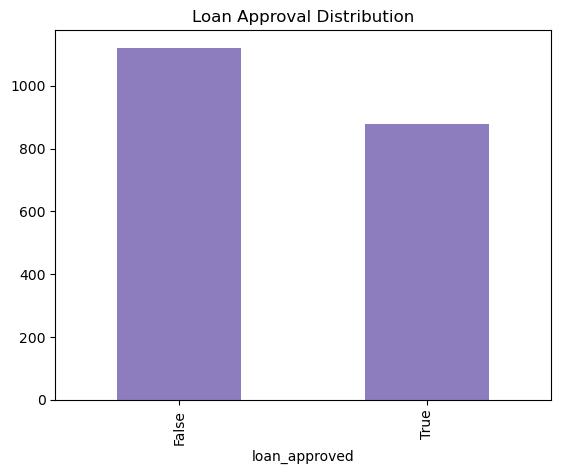

In [11]:
df['loan_approved'].value_counts().plot(kind='bar',color='#8E7DBE')
plt.title("Loan Approval Distribution")
plt.show()

* This chart shows how many loan applications are approved and rejected.

#### Income vs Loan Approval

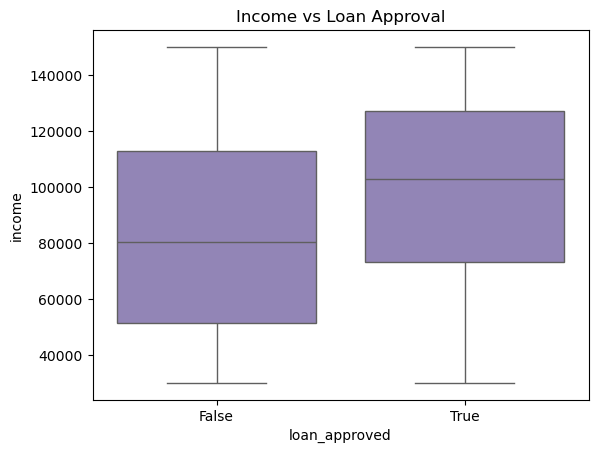

In [12]:
sns.boxplot(x='loan_approved', y='income', color='#8E7DBE', data=df)
plt.title("Income vs Loan Approval")
plt.show()


* This chart compares customer income for approved and rejected loans.

#### Business Insights

In [13]:
df.groupby('loan_approved')[['income','credit_score','years_employed']].mean()

C:\Users\geeth\AppData\Local\Temp\ipykernel_21456\1913165349.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('loan_approved')[['income','credit_score','years_employed']].mean()


,income,credit_score,years_employed
loan_approved,,,
False,83317.456735,472.199822,19.352364
True,99855.614334,703.704209,21.829352


#### Loan Amount vs Income (Scatter Plot)

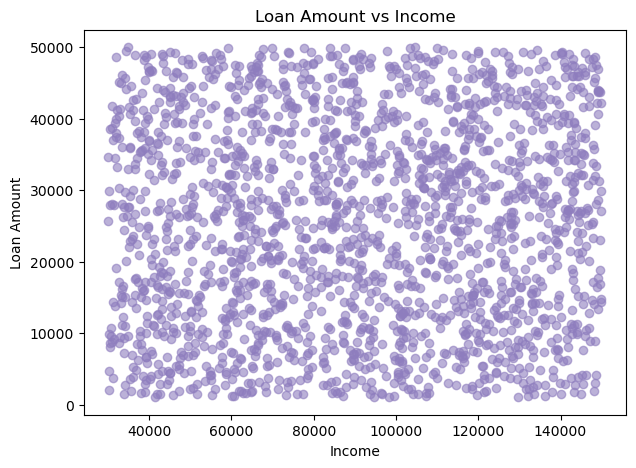

In [14]:
plt.figure(figsize=(7,5))
plt.scatter(df['income'], df['loan_amount'], color='#8E7DBE', alpha=0.6)
plt.title("Loan Amount vs Income")
plt.xlabel("Income")
plt.ylabel("Loan Amount")
plt.show()


* This chart shows the relationship between customer income and loan amount.

#### Loan-to-Income Ratio Distribution

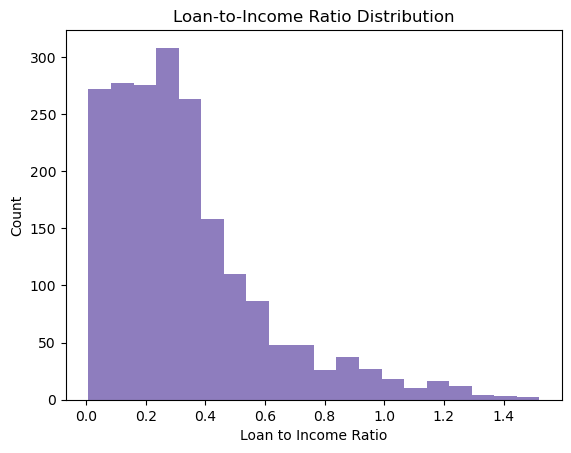

In [15]:
df['loan_income_ratio'] = df['loan_amount'] / df['income']

plt.hist(df['loan_income_ratio'], bins=20, color='#8E7DBE')
plt.title("Loan-to-Income Ratio Distribution")
plt.xlabel("Loan to Income Ratio")
plt.ylabel("Count")
plt.show()

* This chart shows how risky or safe customers are based on loan-to-income ratio.

#### Correlation Analysis

In [16]:
from matplotlib.colors import LinearSegmentedColormap

lavender_cmap = LinearSegmentedColormap.from_list(
    "lavender_theme",
    ["#F4ECF7", "#C39BD3", "#8E7DBE"]   # light → medium → dark lavender
)

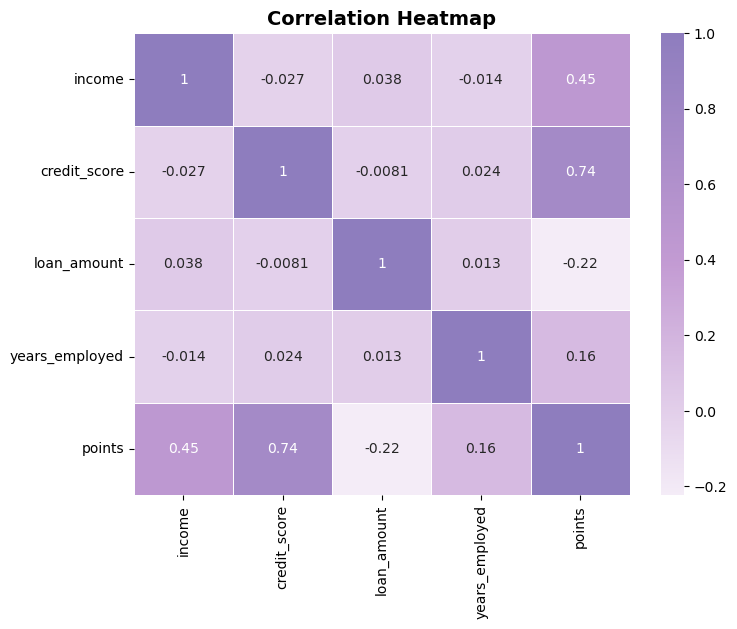

In [17]:
plt.figure(figsize=(8,6))

sns.heatmap(
    df[['income','credit_score','loan_amount','years_employed','points']].corr(),
    annot=True,
    cmap=lavender_cmap,
    linewidths=0.5,
    linecolor="white"
)

plt.title("Correlation Heatmap", fontsize=14, fontweight="bold")
plt.show()


* This chart shows the relationship between income, credit score, loan amount, experience and points.

#### Key Business Insights
From the analysis, the following insights were observed:

* Customers with higher income are more likely to get higher loan amounts.

* Higher credit scores increase the chances of loan approval.

* Customers with more years of employment show better approval probability.

* Loan amount is strongly influenced by income and credit score.

* Customers with higher reward points generally have better financial stability.

* There is a positive relationship between experience and income.

* Low credit score customers face higher rejection risk.

* Most approved loans belong to customers with stable income levels.

* Customers with consistent employment history have better approval rates.

* Financial discipline plays a major role in loan approval decisions.

#### Business Recommendations
Based on the analysis, the following recommendations are

* Banks should give more importance to credit score while approving loans.

* Income verification should be a key step in the approval process.

* Customers with stable employment history should be prioritized.

* Loan amount limits can be set based on income range.

* Financial awareness programs can help low credit score customers improve eligibility.

#### Conclusion

This project helped in understanding how customer financial behavior impacts loan approval.
Using data analysis, banks can make better, faster, and safer lending decisions.

This approach improves:

* Customer satisfaction

* Risk management

* Business profitability